# Wstęp do uczenia maszynowego - Projekt 1
## Topic: School grades - Predict grades of school students based on lifestyle attributes

Adrianna Grudzień\
Kinga Ułasik

# EDA

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker

## Wczytanie danych i pierwszy rzut oka

In [ ]:
grades = pd.read_csv('school_grades_dataset.csv')
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
grades.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11


## Wytłumaczenie nazw kolumn

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [ ]:
grades.info()
# nie ma pustych wartości; dwa typy danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

In [ ]:
grades.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Zauważmy, że
* minimum w G1, G2, G3 wynosi zero, więc możemy przypuszczać, że wśród uczniów znalazł się taki, który nie pojawił się na końcowym egzaminie (lub może nawet nie uczęszczał na przedmiot) 
* średni czas dotarcia do szkoły wynosi ok 22 min
* tygodniowo na naukę uczniowie poświęcają średnio ok. 3,5h

In [ ]:
#sprawdzamy te wiersze które mają zero w G3
grades_zeros = grades.loc[grades['G3'] == 0]
print(grades_zeros)

    school sex  age address famsize Pstatus  ...  Walc  health absences  G1 G2 G3
163     GP   M   18       U     LE3       T  ...     5       4        0  11  9  0
440     MS   M   16       U     GT3       T  ...     5       3        0   7  0  0
519     MS   M   16       R     GT3       T  ...     1       2        0   8  7  0
563     MS   M   17       U     GT3       T  ...     3       5        0   7  0  0
567     MS   M   18       R     GT3       T  ...     2       5        0   4  0  0
583     MS   F   18       R     GT3       T  ...     1       3        0   8  6  0
586     MS   F   17       U     GT3       T  ...     3       5        0   8  8  0
597     MS   F   18       R     GT3       T  ...     1       4        0   9  0  0
603     MS   F   18       R     LE3       A  ...     1       5        0   5  0  0
605     MS   F   19       U     GT3       T  ...     3       2        0   5  0  0
610     MS   F   19       R     GT3       A  ...     4       1        0   8  0  0
626     MS   F  

Zauważmy, że wszyscy uczniowie, którzy otrzymali 0 na egzaminie końcowym, na pewno podeszli do egzaminu w pierwszym semestrze, ale część z nich otrzymało wynik zero w egzaminie w drugi semestrze (możliwe, że zrezygnowali po pierwszym, stąd taka ocena ?)

## Korelacja

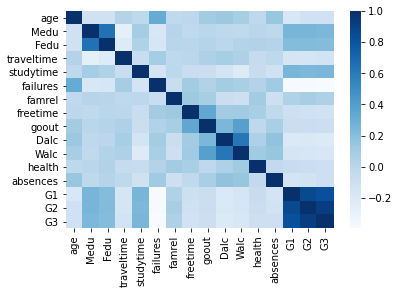

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(grades.corr(), cmap='Blues',annot=False)

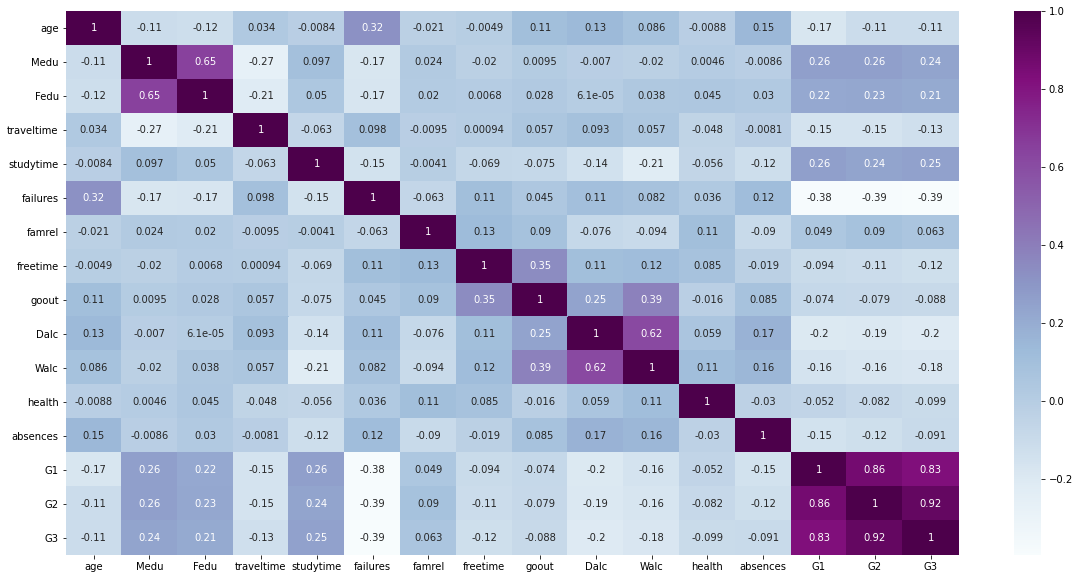

In [ ]:
#odfiltrujmy te wartości dla których jest sens liczyć korelacje
l = grades.columns.values
r = [2,6,7,12,13,14,23,24,25,26,27,28,29,30,31,32]
l = l[r]

plt.figure(figsize=(20,10))
plot = grades[l].corr()
sns.heatmap(plot, cmap = 'BuPu',annot=True)

Można zauważyć silną korelację pomiędzy G1, G2, G3, co jest logiczne, biorąc pod uwagę, że są to kolejne wyniki z semstru (G1 i G2 silnie wpływają na G3).

Widać również korelację pomiędzy Fedu i Medu (czyli edukacją rodziców); między Walc i Dalc (spożycie alkoholu kolejno w weekend, dzień roboczy) oraz między goout i freetime oraz failures a wynikami końcowymi. Przyjrzyjmy się im bliżej.

In [ ]:
#zależność Fedu i Medu
tmp_df = grades.groupby(['Fedu', 'Medu']).size().reset_index(name='counts')
tmp_df.tail()


,Fedu,Medu,counts
16,3,4,44
17,4,1,2
18,4,2,8
19,4,3,23
20,4,4,95


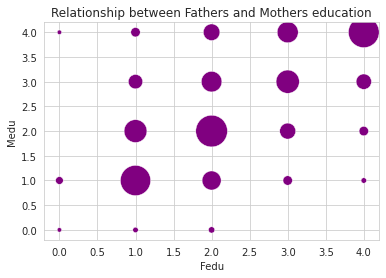

In [ ]:
bubble = sns.scatterplot(data=tmp_df, x="Fedu", y="Medu", size="counts", legend=False, sizes=(20, 1000), color='purple')
bubble.set_title('Relationship between Fathers and Mothers education')
plt.show()

Obserwacje: Widać, że największe "bąbelki" są na przekątnej, można zaryzykować wnioski, że ludzie najczęsciej dobierają się w małżeństwa z osobą z podobnym poziomem edukacji.

In [ ]:
#zależność Dalc i Walc
alcohol_df = grades.groupby(['Dalc', 'Walc']).size().reset_index(name='counts')
alcohol_df.head()

,Dalc,Walc,counts
0,1,1,241
1,1,2,113
2,1,3,64
3,1,4,28
4,1,5,5


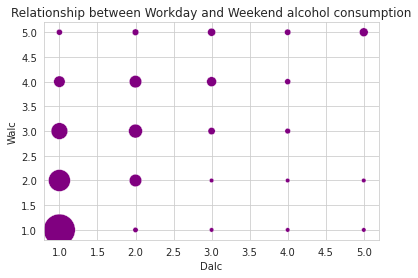

In [ ]:
bubble2 = sns.scatterplot(data=alcohol_df , x="Dalc", y="Walc", size="counts", 
                          legend=False, sizes=(20, 1000), color='purple')
bubble2.set_title('Relationship between workDay and Weekend alcohol consumption')
plt.show()

Obserwacje: Najwięcej jest uczniów spożywających małe ilości alkoholu zarówno w dni robocze, jak i weekendy. Widać wyraźną tendencję dowodzącą, że, zgodnie z intuicją, ogólne spożycie alkoholu zwiększa się w weekend.

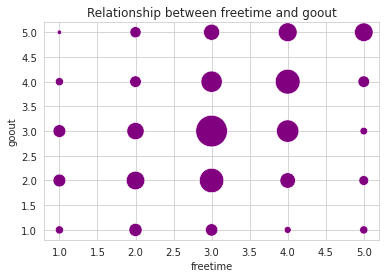

In [ ]:
#zależność freetime i goout
tmp_df = grades.groupby(['freetime', 'goout']).size().reset_index(name='counts')

bubble = sns.scatterplot(data=tmp_df, x="freetime", y="goout", size="counts", 
                         legend=False, sizes=(20, 1000), color='purple')
bubble.set_title('Relationship between freetime and goout')
plt.show()

Obserwacje: Jest stosunkowo mało uczniów, którzy mając dużo czasu wolnego, nie przeznazają go na wyjścia ze znajomymi. (Ma to znaczenie ze względów społecznym i psychologicznych wśród dzieci i młodzieży.)
Najczęściej uczniowie zaznaczali freetime=3 oraz goout=3.

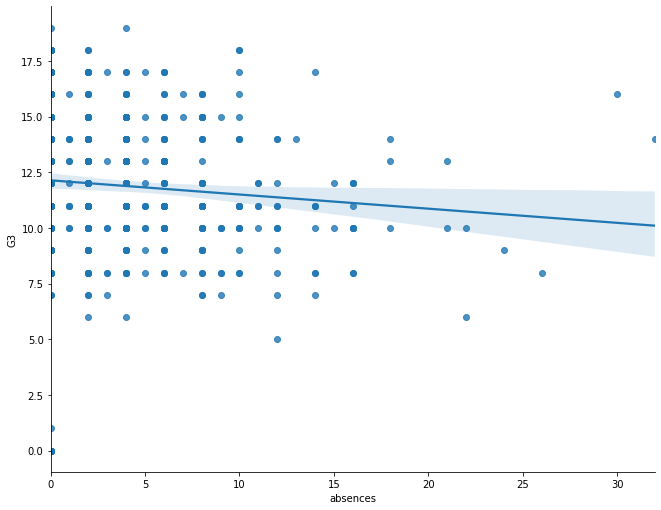

In [ ]:
sns.lmplot( x='absences', y='G3', data=grades, size=7, aspect=1.3)
plt.title('Relationship between absences and final grade (G3)')

plt.show()

Tendencja nie jest bardzo wyraźna, ale mimo to możemy zaobserwować, że im więcej nieobecności, tym wyniki końcowe w nauce są niższe

## Mapowanie zmiennych binarnych
Dla ułatwienia sobie analizy wartości kolumn schoolsup, famsup, paid,activities, nursery, higher, internet, romantic, które przyjmują jedynie 'yes' lub 'no' na wartości liczbowe odpowiednio jeden i zero.

In [ ]:
binary = {'yes':1, 'no':0}
grades_map = grades.copy(deep=True)
grades_map.schoolsup = grades.schoolsup.map(binary)
grades_map.famsup = grades.famsup.map(binary)
grades_map.paid= grades.paid.map(binary)
grades_map.activities = grades.activities.map(binary)
grades_map.nursery = grades.nursery.map(binary)
grades_map.higher = grades.higher.map(binary)
grades_map.internet = grades.internet.map(binary)
grades_map.romantic = grades.romantic.map(binary)

#zobaczmy czy wszystko się właściwie zmapowało
grades_map.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


## Histogramy

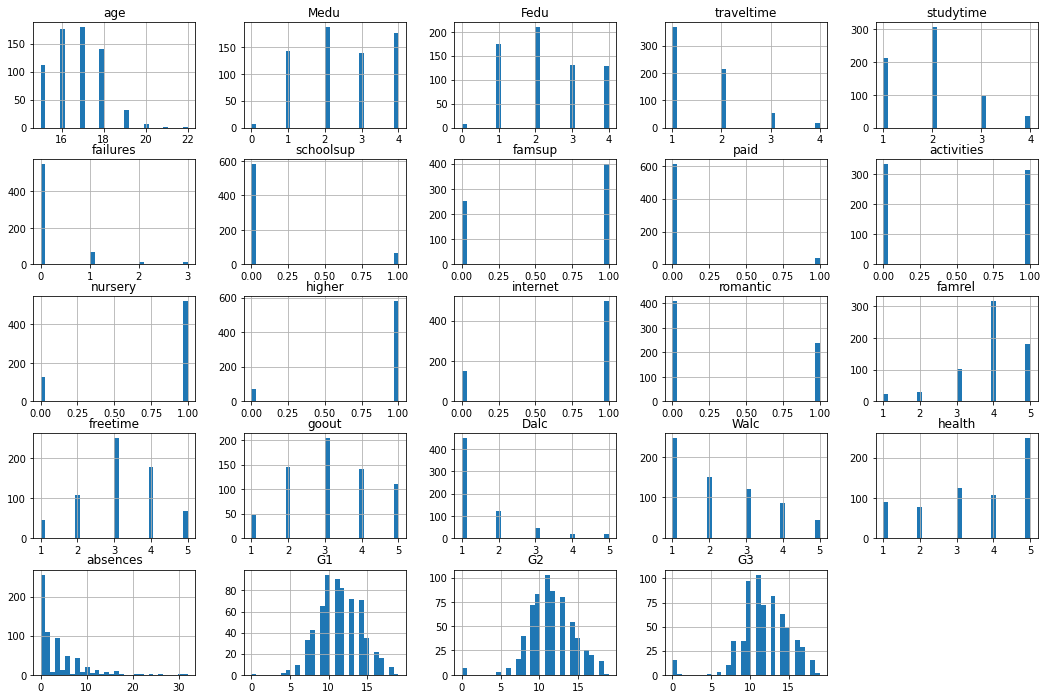

In [ ]:
grades_map.hist(figsize=(18, 12), bins=30)
plt.show()

Zgodnie z przewidywaniami, zmienne G1, G2, G3 mają rozkład w przybliżeniu normalny, podobnie zachowuje się goout i freetime. Z kolei zmienna absences oraz Dalc - rozkład wykładniczy.

## Boxploty

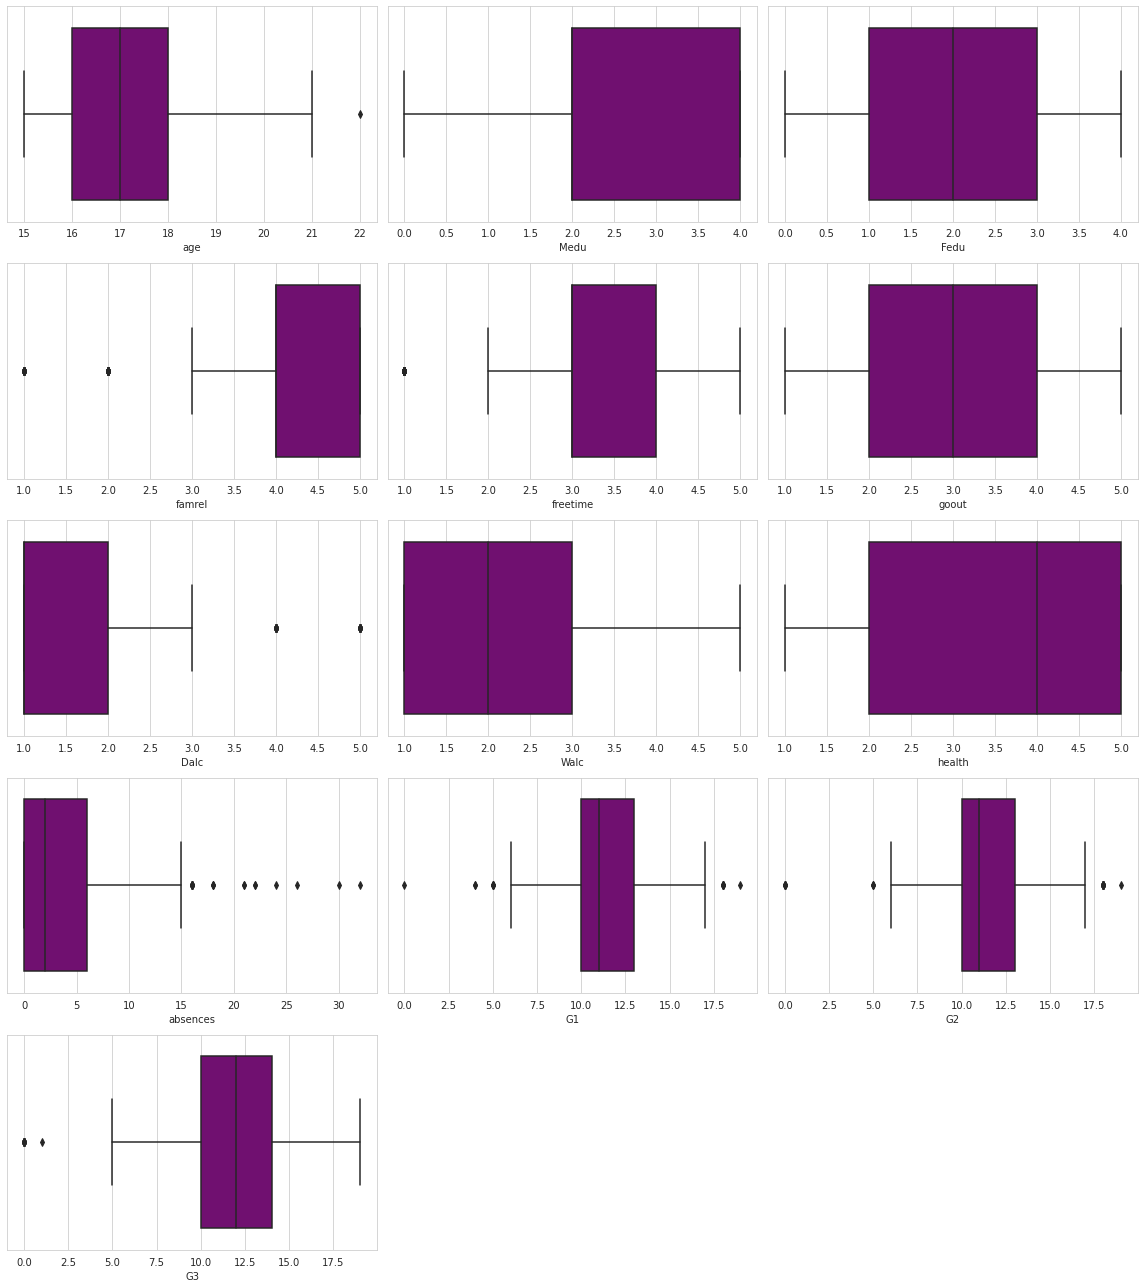

In [ ]:
l = grades.columns.values
r = [2,6,7, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
l = l[r]

number_of_columns = 3
number_of_rows = 4

plt.figure(figsize=(16, 18))
for i in range(0, len(l)):
      plt.subplot(number_of_rows + 1, number_of_columns, i+1)
      sns.set_style('whitegrid')
      sns.boxplot(grades[l[i]],color='purple', orient='v')
      plt.tight_layout()

Zauważmy, że większość zmiennych nie ma outlier'ów (lub ma ich niewiele) oprócz absences, gdzie wyraźnie outlier'ów jest sporo. Możemy z tych wykresów dowiedzieć się sporo o wartościach średnich w kolumnach.

## Scatter Plots
W celu przyjrzenia się zaleźnościom zmiennej targetowej (G3) od innych zmiennych stwórzmy wykresy punktowe.

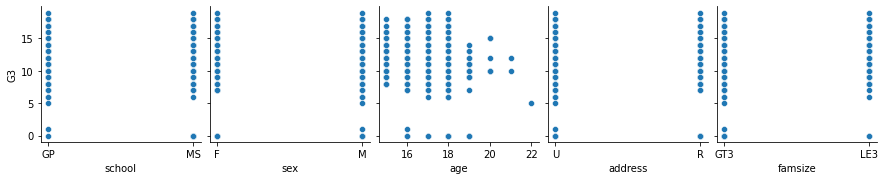

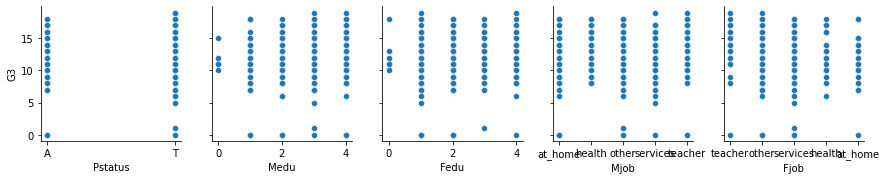

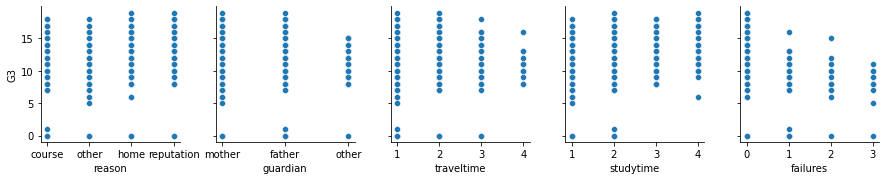

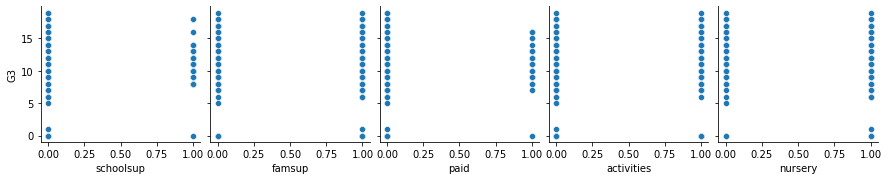

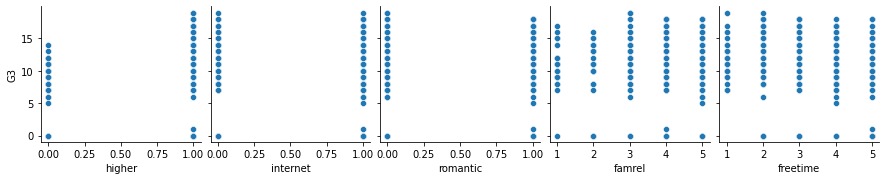

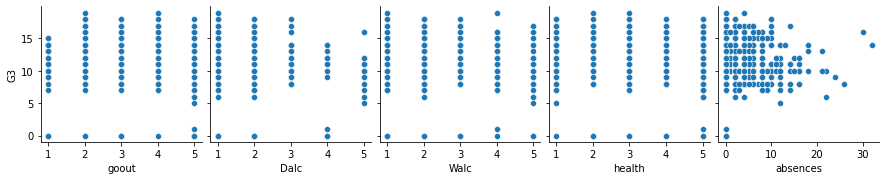

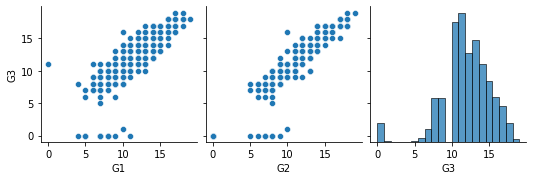

In [ ]:
sns.pairplot(grades_map, y_vars="G3", x_vars=grades_map.columns.values[:5])
sns.pairplot(grades_map, y_vars="G3", x_vars=grades_map.columns.values[5:10])
sns.pairplot(grades_map, y_vars="G3", x_vars=grades_map.columns.values[10:15])
sns.pairplot(grades_map, y_vars="G3", x_vars=grades_map.columns.values[15:20])
sns.pairplot(grades_map, y_vars="G3", x_vars=grades_map.columns.values[20:25])
sns.pairplot(grades_map, y_vars="G3", x_vars=grades_map.columns.values[25:30])
sns.pairplot(grades_map, y_vars="G3", x_vars=grades_map.columns.values[30:])

plt.show()

Najbardziej widoczna zależność od G3 występuje przy zmiennej absences. Dodatkowo można zauważyć tendencję malejącą maxymalnych wyników wraz ze wzrostem liczby niezdanych klas patrząc na wykres zależności G3 od failures. Przyjrzyjmy się temu bliżej.

Inna obsewacja: nikt z uczeniów nie uzyskał wyniku 3, 4 lub 9ciu punktów z egzaminu końcowego.

In [ ]:
# absences_df = grades[['absences', 'G3','health']]
absences_df = grades.copy(deep=True)
absences_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


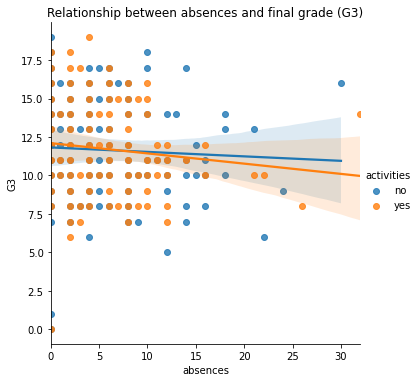

In [ ]:
tmp_df = grades.groupby(['G3', 'absences', 'activities']).size().reset_index(name='counts')
tmp_df.tail()

sns.lmplot(x='absences',y='G3', data=tmp_df, hue='activities')
plt.title('Relationship between absences and final grade (G3)')
plt.show()

Obserwacje: Ogólnie, im więcej nieobecności, tym niższe oceny. W szczególności, jeśli uczeń angażuje się w aktywności, to ta zależność jest silniejsza. Być może wynika to z tego, że jego priorytetem jest właśnie ta aktywność, więc mniej zależy mu na ocenach

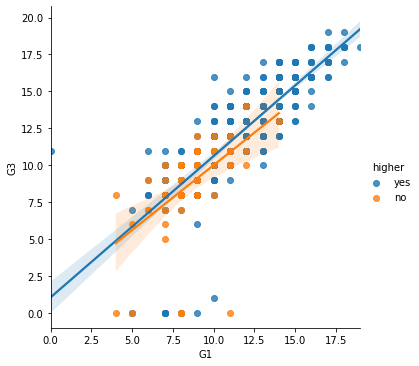

In [ ]:
sns.lmplot(x='G1',y='G3', data=grades, hue='higher')
plt.title('Relationship between absences and final grade (G3)')

plt.show()

Uczniowie chcący się ubiegać o miejsce w szkole wyższej osiągają lepsze oceny i bardziej zależy im na poprawie ostatecznych ocen.

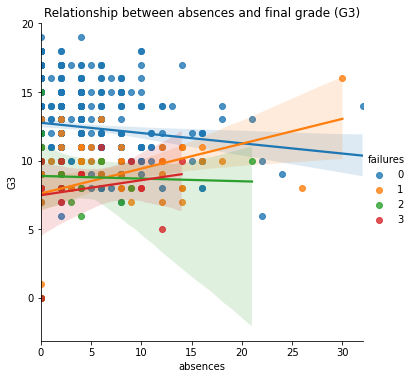

In [ ]:
sns.lmplot(x='absences',y='G3', data=grades, hue='failures')

plt.title('Relationship between absences and final grade (G3)')
plt.show()

Możemy zaobserwować wyraźną zależność - osoby, który mają za sobą powtarzanie klasy, osiągają niższe wyniki w nauce. Co zaskakujące, widzimy odmienne zależności dla poszczególnych grup uczniów. Wygląda na to, że jeśli ktoś raz nie zdał klasy, bardziej zależy mu na ocenach proporcjonalnie do liczby nieobecności.

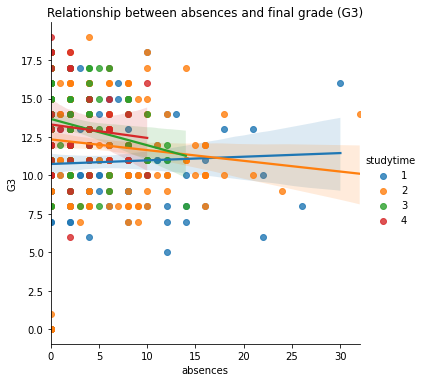

In [ ]:
sns.lmplot(x='absences',y='G3', data=grades, hue='studytime')

plt.title('Relationship between absences and final grade (G3)')
plt.show()

Wygląda na to, że im więcej czaso uczeń poświęca na naukę, tym osiąga wyższe oceny i rzadziej wagaruje.
Ciekawe zależności - dla każdej grupy uczniów linia dopasowania wygląda inaczej